## Accessing NOAA U.S. Gridded Climate Normals with the Planetary Computer STAC API

The [NOAA U.S. Gridded Climate Normals](https://www.ncei.noaa.gov/products/land-based-station/us-climate-normals#tab-1027) provide gridded temperature and precipitation datasets across the contiguous United States (CONUS) at approximately 5km resolution. The gridded normals include annual, seasonal, monthly and daily long-term averages computed from NOAA's NClimGrid dataset. Normals act both as a ruler to compare current weather and as a predictor of conditions in the near future.

Annual, seasonal, and monthly gridded normals are provided for three time-periods:
- 100-year (1901–2000)
- 30-year (1991–2020)
- 15-year (2006–2020)

Daily gridded normals are provided for two time-periods:
- 30-year (1991–2020)
- 15-year (2006–2020)

Documentation for this dataset is available at the [Planetary Computer Data Catalog](https://planetarycomputer.microsoft.com/dataset/noaa-climate-normals-gridded).

### Data Access
This notebook works with or without an API key, but you will be given more permissive access to the data with an API key. The [Planetary Computer Hub](https://planetarycomputer.microsoft.com/compute) sets the environment variable "PC_SDK_SUBSCRIPTION_KEY" when your server is started. The API key may be manually set via the following code:

```python
pc.settings.set_subscription_key(<YOUR API Key>)
```

The datasets hosted by the Planetary Computer are available in [Azure Blob Storage](https://docs.microsoft.com/en-us/azure/storage/blobs/). We'll use [pystac-client](https://pystac-client.readthedocs.io/) to search the Planetary Computer's [STAC API](https://planetarycomputer.microsoft.com/api/stac/v1/docs) for the subset of the data that we care about, and then we'll load the data directly from Azure Blob Storage. We'll specify a `modifier` so that we can access the data stored in the Planetary Computer's private Blob Storage Containers. See [Reading from the STAC API](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/) and [Using tokens for data access](https://planetarycomputer.microsoft.com/docs/concepts/sas/) for more.

In [1]:
import planetary_computer
import pystac_client

# Open the Planetary Computer STAC API
catalog = pystac_client.Client.open(
    "https://planetarycomputer-staging.microsoft.com/api/stac/v1/",
    modifier=planetary_computer.sign_inplace,
)
collection = catalog.get_collection("noaa-climate-normals-gridded")
print(collection)

<CollectionClient id=noaa-climate-normals-gridded>


In [2]:
# Search the catalog and collection for desire
search = catalog.search(
    collections=collection,
    query={
        "noaa_climate_normals:period": {
            "eq": "1991-2020"
        },  # Available periods = "1901-2000", "1991-2020", and "2006-2020"
        "noaa_climate_normals:frequency": {
            "eq": "monthly"
        },  # Available frequencies = "seasonal", "annual", "monthly", and "daily"
        "noaa_climate_normals:time_index": {
            "eq": "4"
        },  # Available time indices = seasonal (1-4), monthly (1-12), and daily (1-365)
    },
)
items = list(search.get_items())
items

[<Item id=1991_2020-monthly-04>]

### Available Assets & Metadata

Let's display the available [assets](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md#asset-object) and metadata for NOAA U.S. Gridded Climate Normals. 

In [3]:
import rich.table

# Assets
t_assets = rich.table.Table("Key", "Value")
for key, asset in items[0].assets.items():
    t_assets.add_row(key, asset.description)
t_assets

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key              ┃ Value                                                                                        ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ prcp_max         │ Maximum precipitation of monthly precipitation values of all input years for a given month   │
│ prcp_min         │ Minimum precipitation of monthly precipitation values of all input years for a given month   │
│ prcp_std         │ Standard deviation of monthly precipitation values of all input years for a given month      │
│ tavg_max         │ Maximum temperature of monthly mean temperature values of all input years for a given month  │
│ tavg_min         │ Minimum temperature of monthly mean temperature values of all input years for a given month  │
│ tavg_std         │ Standard deviation of monthly mean temperature values of all input years for a given month   │
│ tmax_max         │ Maximum temperature of monthly maximum temperature values of all input years for a given     │
│                  │ month                                                                                        │
│ tmax_min         │ Minimum temperature of monthly maximum temperature values of all input years for a given     │
│                  │ month                                                                                        │
│ tmax_std         │ Standard deviation of monthly maximum temperature values of all input years for a given      │
│                  │ month                                                                                        │
│ tmin_max         │ Maximum temperature of monthly minimum temperature values of all input years for a given     │
│                  │ month                                                                                        │
│ tmin_min         │ Minimum temperature of monthly minimum temperature values of all input years for a given     │
│                  │ month                                                                                        │
│ tmin_std         │ Standard deviation of monthly minimum temperature values of all input years for a given      │
│                  │ month                                                                                        │
│ prcp_flag        │ Number of years used to calculate monthly precipitation normals                              │
│ prcp_norm        │ Monthly precipitation normals from monthly precipitation values                              │
│ tavg_flag        │ Number of years used to calculate monthly mean temperature normals                           │
│ tavg_norm        │ Monthly mean temperature normals from monthly averages                                       │
│ tmax_flag        │ Number of years used to calculate monthly maximum temperature normals                        │
│ tmax_norm        │ Maximum temperature normals from monthly averages                                            │
│ tmin_flag        │ Number of years used to calculate monthly minimum temperature normals                        │
│ tmin_norm        │ Minimum temperature normals from monthly averages                                            │
│ tilejson         │                                                                                              │
│ rendered_preview │                                                                                              │
└──────────────────┴──────────────────────────────────────────────────────────────────────────────────────────────┘

In [4]:
# Metadata
t_metadata = rich.table.Table("Key", "Value")
for k, v in sorted(items[0].properties.items()):
    t_metadata.add_row(k, str(v))
t_metadata

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key                             ┃ Value                                                           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ created                         │ 2023-01-11T20:12:58.741361Z                                     │
│ datetime                        │ None                                                            │
│ end_datetime                    │ 2020-12-31T23:59:59Z                                            │
│ noaa_climate_normals:frequency  │ monthly                                                         │
│ noaa_climate_normals:period     │ 1991-2020                                                       │
│ noaa_climate_normals:time_index │ 4                                                               │
│ proj:epsg                       │ 4326                                                            │
│ proj:shape                      │ [596, 1385]                                                     │
│ proj:transform                  │ [0.04166667, 0.0, -124.70833333, 0.0, -0.04166667, 49.37500127] │
│ start_datetime                  │ 1991-01-01T00:00:00Z                                            │
│ title                           │ 1991-2020 Monthly Climate Normals for April                     │
└─────────────────────────────────┴─────────────────────────────────────────────────────────────────┘

### Loading the gridded data
Now let's load STAC items into an xarray dataset using [odc-stac](https://github.com/opendatacube/odc-stac).

In [5]:
import odc.stac

ds = odc.stac.load(items, chunks={})
ds

<xarray.Dataset>
Dimensions:      (latitude: 596, longitude: 1385, time: 1)
Coordinates:
  * latitude     (latitude) float64 49.35 49.31 49.27 49.23 ... 24.65 24.6 24.56
  * longitude    (longitude) float64 -124.7 -124.6 -124.6 ... -67.06 -67.02
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 1991-01-01
Data variables: (12/20)
    prcp_max     (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>
    prcp_min     (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>
    prcp_std     (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>
    tavg_max     (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>
    tavg_min     (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>
    tavg_std     (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>
    ...           ...
    tavg_flag    (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>
    tavg_norm    (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>
    tmax_flag    (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>
    tmax_norm    (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>
    tmin_flag    (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>
    tmin_norm    (time, latitude, longitude) float32 dask.array<chunksize=(1, 596, 1385), meta=np.ndarray>

### Displaying the gridded data

Let's display the 1991-2020 precipitation normal for April.

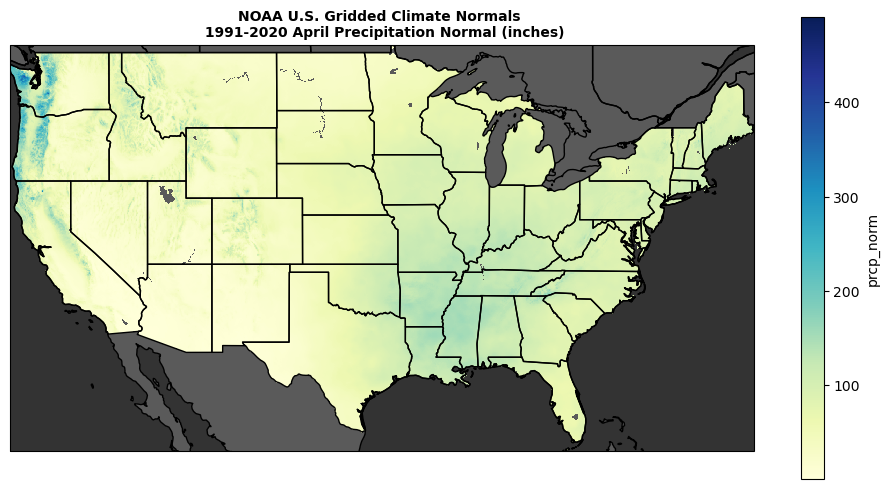

In [6]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Mercator())

prcp = ds.prcp_norm.sel(method="nearest")

prcp.plot(
    ax=ax,
    cmap="YlGnBu",
    transform=ccrs.PlateCarree(),
)

ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.OCEAN, zorder=0, linewidth=0, facecolor="#333333")
ax.add_feature(cfeature.LAND, zorder=0, linewidth=0, facecolor="#5A5A5A")
ax.set_title(
    "NOAA U.S. Gridded Climate Normals \n 1991-2020 April Precipitation Normal (inches)",
    fontweight="bold",
    fontsize="10",
);